In [1]:
#Instalamos las bibliotecas necesarias:
!pip install pandas openpyxl

In [3]:
import pandas as pd
#Cargamos el archivo de excel
df = pd.read_excel("C:/Users/piliv/OneDrive/Documentos/GitHub/-Big-Data-UNT--Grupo-1-/TP02/Base Limpia Airbnb NY.xlsx")
#El siguiente comando nos enseña las primeras filas de la base que cargamos
print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park   2787.0   
1  2595                             Skylit Midtown Castle   2845.0   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !   4632.0   
3  3831                   Cozy Entire Floor of Brownstone   4869.0   
4  5022  Entire Apt: Spacious Studio/Loft by central park   7192.0   

     host_name neighbourhood_group neighbourhood   latitude  longitude  \
0         John            Brooklyn    Kensington  4064749.0 -7397237.0   
1     Jennifer           Manhattan       Midtown  4075362.0 -7398377.0   
2    Elisabeth           Manhattan        Harlem  4080902.0  -739419.0   
3  LisaRoxanne            Brooklyn  Clinton Hill  4068514.0 -7395976.0   
4        Laura           Manhattan   East Harlem  4079851.0 -7394399.0   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  149.0             1.0                9

In [5]:
#Nos interesa conocer el numero de observaciones duplicadas en el dataframe. Usamos los comandos:
num_duplicados = df.duplicated().sum()
print(f'Número de filas duplicadas: {num_duplicados}')

Número de filas duplicadas: 11


In [7]:
#Para eliminar los duplicados usamos:
df_original = df.copy()
df.drop_duplicates(inplace=True)
#Verificamos haberlos eliminado 
num_duplicados = df.duplicated().sum()
print(f'Número de filas duplicadas: {num_duplicados}')

Número de filas duplicadas: 0


In [9]:
#Como siguiente paso nos interesa conocer el número de missing values por variable. Usamos los comandos:
missing_values = df.isnull().sum()
print(missing_values)

id                                  161
name                                 41
host_id                             285
host_name                           307
neighbourhood_group                 285
neighbourhood                       285
latitude                            285
longitude                           285
room_type                           285
price                               300
minimum_nights                      285
number_of_reviews                   285
last_review                       10323
reviews_per_month                 10323
calculated_host_listings_count      285
availability_365                    285
dtype: int64


In [11]:
#Eliminamos las 285 observaciones para las cuales tenemos datos faltantes en la variable host_id
#Como 10 de las 16 variables tienen ese mismo número de datos faltantes nos interesa saber si son para las mismas observaciones
#De ser ese el caso, no sería útil conservar esas observaciones porque nos faltan más datos de los que tenemos
df = df.dropna(subset=['host_id'])
missing_values = df.isnull().sum()
print(missing_values)

id                                  160
name                                 26
host_id                               0
host_name                            22
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
last_review                       10038
reviews_per_month                 10038
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [13]:
#Como las columnas id, host_id, host_name y name ya fueron usadas para eliminar duplicados
#y no se espera que tengan ninguna relevancia en el análisis y predicción de los datos, optamos por eliminarlas.
df = df.drop(columns=['id', 'name', 'host_id', 'host_name'])
missing_values = df.isnull().sum()
print(missing_values)

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
last_review                       10038
reviews_per_month                 10038
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [15]:
#Nos pareció extraño que hubieran tantos datos faltantes en las variables reviews_per_month y last_review
#Así que filtramos los datos y nos percatamos que las celdas estaban vacías en las observaciones para las que number_of_reviews era igual a cero
#Por ello tomamos la decisión de reemplazar los missing values con ceros
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
#En cuanto a la variable last_review, decidimos no incorporarla en el análisis debido al dtype de esa variable 
df = df.drop(columns=['last_review'])
missing_values = df.isnull().sum()
print(missing_values)

neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                             15
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


In [17]:
#En el caso de los datos faltantes para la variable price decidimos imputar por la media CONDICIONAL al tipo de habitación
#y al vecindario al que pertenece el airbnb cuyo precio no fue reportado. Para ello usamos el comando:
datos_faltantes = df.loc[df['price'].isnull(), ['room_type', 'neighbourhood']]
print(datos_faltantes)

             room_type       neighbourhood
4506   Entire home/apt     Lower East Side
12567     Private room          Greenpoint
12925     Private room         South Slope
25430     Private room          Kensington
26821     Private room             Belmont
27093  Entire home/apt  University Heights
28238  Entire home/apt             Midtown
35308     Private room         Sunset Park
35641     Private room            Flushing
35679     Private room             Tribeca
37140  Entire home/apt         South Slope
41176     Private room        Williamsburg
42039  Entire home/apt         Murray Hill
44047     Private room           Ridgewood
48890     Private room            Bushwick


In [19]:
#El siguiente paso consiste en calcular el precio promedio para los pares de room_type y neighbourhood
#Que presentan missing values en price. Calculamos 15 precios medios condicionales a room_type y neighbourhood
precio_media = df.loc[
    (df['room_type'] == 'Entire home/apt') & 
    (df['neighbourhood'] == 'Lower East Side'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Greenpoint'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'South Slope'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Kensington'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Belmont'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Entire home/apt') & 
    (df['neighbourhood'] == 'University Heights'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Entire home/apt') & 
    (df['neighbourhood'] == 'Midtown'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Sunset Park'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Flushing'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Tribeca'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Entire home/apt') & 
    (df['neighbourhood'] == 'South Slope'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Williamsburg'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Entire home/apt') & 
    (df['neighbourhood'] == 'Murray Hill'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Ridgewood'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

precio_media = df.loc[
    (df['room_type'] == 'Private room') & 
    (df['neighbourhood'] == 'Bushwick'),
    'price'
].mean()
print(f"La media del precio es: {precio_media}")

La media del precio es: 234.6158415841584
La media del precio es: 88.40631578947368
La media del precio es: 85.74725274725274
La media del precio es: 59.30927835051546
La media del precio es: 53.94444444444444
La media del precio es: 120.0
La media del precio es: 301.35122838944494
La media del precio es: 77.82843137254902
La media del precio es: 63.37581699346405
La media del precio es: 192.54545454545453
La media del precio es: 177.2139037433155
La media del precio es: 85.7565130260521
La media del precio es: 237.8391959798995
La media del precio es: 56.33922261484099
La media del precio es: 62.593804792518995


In [21]:
#Ahora podemos reemplazar los missing values de price por los precios medios condicionales a room_type y neighbourhood
df.at[4506, 'price'] = 234.6
df.at[12567, 'price'] = 88.4
df.at[12925, 'price'] =85.7
df.at[25430, 'price'] = 59.3
df.at[26821, 'price'] = 53.9

df.at[27093, 'price'] = 120.0
df.at[28238, 'price'] = 301.4
df.at[35308, 'price'] = 77.8
df.at[35641, 'price'] = 63.4
df.at[35679, 'price'] = 192.5

df.at[37140, 'price'] = 177.2
df.at[41176, 'price'] = 85.8
df.at[42039, 'price'] = 237.8
df.at[44047, 'price'] = 56.3
df.at[48890, 'price'] = 62.6

#Verificamos que los datos faltantes ya no están en el dataframe
missing_values = df.isnull().sum()
print(missing_values)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [23]:
#Por otro lado transformamos la variable neighbourhood_group del siguiente modo:
mapeo_neighbourhood_group = {
    'Bronx': 1,
    'Brooklyn': 2,
    'Manhattan': 3,
    'Queens': 4,
    'Staten Island': 5
}
df['neighbourhood_group'] = df['neighbourhood_group'].map(mapeo_neighbourhood_group)
frecuencias = df['neighbourhood_group'].value_counts()
print(frecuencias)

neighbourhood_group
3    21635
2    20065
4     5627
1     1090
5      372
Name: count, dtype: int64


In [25]:
#Repetimos el proceso con la variable room_type
mapeo_room_type = {
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3
}
df['room_type'] = df['room_type'].map(mapeo_room_type)
frecuencias = df['room_type'].value_counts()
print(frecuencias)

room_type
1    25366
2    22278
3     1145
Name: count, dtype: int64


In [27]:
import pandas as pd
#Para crear la columna offer group primero contamos la cantidad de oferentes por neighbourhood_group
offer_counts = df.groupby('neighbourhood_group').size().reset_index(name='offer_count')
#Ordenamos por la cantidad de oferentes y asignamos un ranking
offer_counts['offer group'] = offer_counts['offer_count'].rank(method='dense').astype(int)
df = df.merge(offer_counts[['neighbourhood_group', 'offer group']], on='neighbourhood_group', how='left')
print(df.head())

   neighbourhood_group neighbourhood   latitude  longitude  room_type  price  \
0                    2    Kensington  4064749.0 -7397237.0          2  149.0   
1                    3       Midtown  4075362.0 -7398377.0          1  225.0   
2                    3        Harlem  4080902.0  -739419.0          2  150.0   
3                    2  Clinton Hill  4068514.0 -7395976.0          1   89.0   
4                    3   East Harlem  4079851.0 -7394399.0          1   80.0   

   minimum_nights  number_of_reviews  reviews_per_month  \
0             1.0                9.0               0.21   
1             1.0               45.0               0.38   
2             3.0                0.0               0.00   
3             1.0              270.0               4.64   
4            10.0                9.0               0.10   

   calculated_host_listings_count  availability_365  offer group  
0                             6.0             365.0            4  
1                             

In [31]:
#Guardamos los avances en un excel
df.to_excel('mi_df.xlsx', index=False)

In [37]:
#Descargamos las bibliotecas que vamos a necesitar este período
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
#Usamos una base de datos de excel que conserva los cambios realizados a 'mi_df.xlsx' pero
#Tiene solamente las variables que aparecen en el enunciado del Ejercicio 2
df1 = pd.read_excel("C:\\Users\\piliv\\OneDrive\\Documentos\\GitHub\\-Big-Data-UNT--Grupo-1-\\TP02\\mi_df_punto2.xlsx")
print(df1.head())

   neighbourhood_group   latitude  longitude  room_type  price  \
0                    2  4064749.0 -7397237.0          2  149.0   
1                    3  4075362.0 -7398377.0          1  225.0   
2                    3  4080902.0  -739419.0          2  150.0   
3                    2  4068514.0 -7395976.0          1   89.0   
4                    3  4079851.0 -7394399.0          1   80.0   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                  9               0.21   
1               1                 45               0.38   
2               3                  0                NaN   
3               1                270               4.64   
4              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               

In [41]:
#Como necesitaremos convertir las variables para realizar la matriz de correlación, primero vemos de qué tipo son las variables
print(df1.dtypes)

neighbourhood_group                 int64
latitude                          float64
longitude                         float64
room_type                           int64
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [43]:
#Convertimos las variables al tipo adecuado (float o int)
df1['neighbourhood_group'] = df1['neighbourhood_group'].astype(int)
df1['latitude'] = df1['latitude'].astype(float)
df1['longitude'] = df1['longitude'].astype(float)
df1['room_type'] = df1['room_type'].astype(int)
df1['price'] = df1['price'].astype(float)
df1['minimum_nights'] = df1['minimum_nights'].astype(int)
df1['number_of_reviews'] = df1['number_of_reviews'].astype(int)
df1['reviews_per_month'] = df1['reviews_per_month'].astype(float)
df1['calculated_host_listings_count'] = df1['calculated_host_listings_count'].astype(int)
df1['availability_365'] = df1['availability_365'].astype(int)

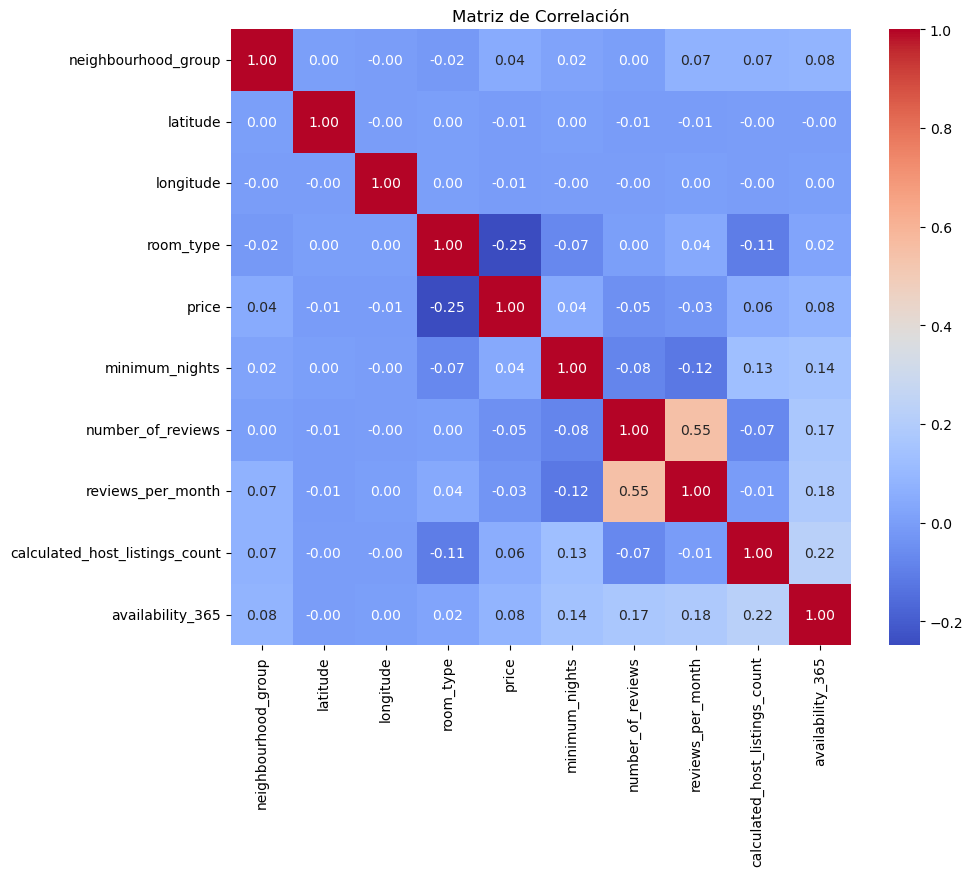

In [45]:
#Ahora utilizamos los comandos para generar la matriz de correlación:
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [47]:
#Para hacer los histogramas, debemos mapear nuevamente los números con los vecindarios
#Ya que en pasos anteriores habían quedado definido en números. Esto hará que en los gráficos aparezcan los nombres.
neighbourhood_mapping = {
    1: 'Bronx',
    2: 'Brooklyn',
    3: 'Manhattan',
    4: 'Queens',
    5: 'Staten Island'
}
df1['neighbourhood_group'] = df1['neighbourhood_group'].replace(neighbourhood_mapping)

neighbourhood_group
Manhattan        44.344012
Brooklyn         41.126074
Queens           11.533337
Bronx             2.234110
Staten Island     0.762467
Name: proportion, dtype: float64


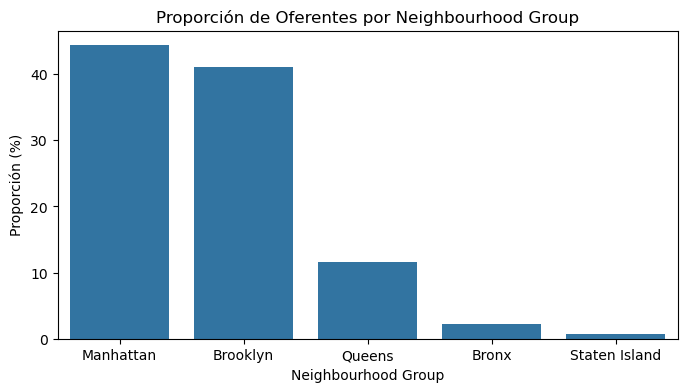

In [49]:
#Calculamos la proporción de oferentes por neighbourhood_group
neighbourhood_proportions = df1['neighbourhood_group'].value_counts(normalize=True) * 100
print(neighbourhood_proportions)
#Para graficar usamos los comandos
plt.figure(figsize=(8, 4))
sns.barplot(x=neighbourhood_proportions.index, y=neighbourhood_proportions.values)
plt.title('Proporción de Oferentes por Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=0)
plt.show()

In [51]:
#Repetimos el procedimiento pero con la variable room_type
room_type_mapping = {
    1: 'Entire home/apt',
    2: 'Private room',
    3: 'Shared room'
}
df1['room_type'] = df1['room_type'].replace(room_type_mapping)

room_type
Entire home/apt    51.991228
Private room       45.661932
Shared room         2.346840
Name: proportion, dtype: float64


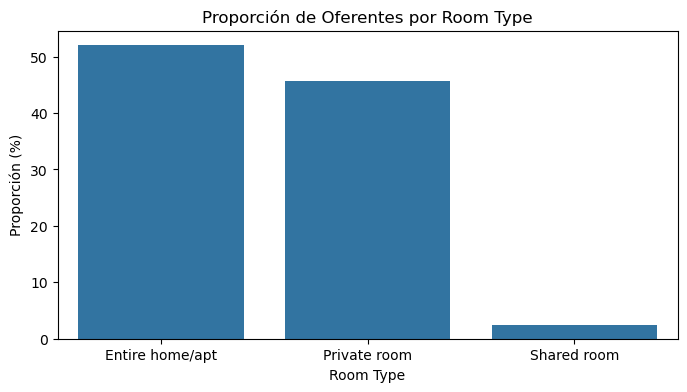

In [53]:
#Calculamos la proporción de oferentes por room_type
room_type_proportions = df1['room_type'].value_counts(normalize=True) * 100
print(room_type_proportions)
#Para graficar usamos los comandos:
plt.figure(figsize=(8, 4))
sns.barplot(x=room_type_proportions.index, y=room_type_proportions.values)
plt.title('Proporción de Oferentes por Room Type')
plt.xlabel('Room Type')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=0)
plt.show()

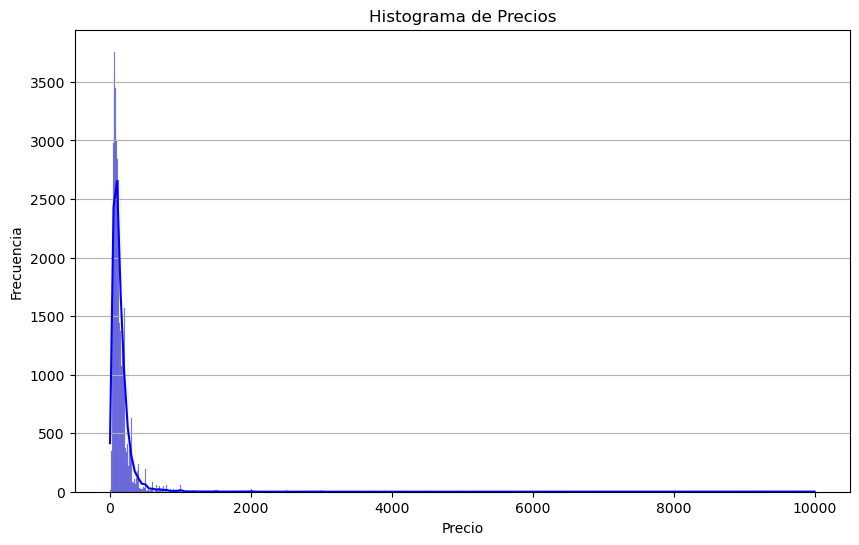

In [55]:
#Hacemos el histograma de la variable price sin haber eliminado outliers para decidir cuántos eliminar
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=1000, kde=True, color='blue')  # kde=True añade una curva de densidad
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

In [57]:
#En efecto las observaciones se acumulan para valores más bajos de price.
#Para decidir a partir de qué precio consideramos que las obseraciones son outliers usamos:
observaciones_alto_precio = (df['price'] >= 450).sum()
print(f"Número de observaciones con price >= 450: {observaciones_alto_precio}")
observaciones_precio_nulo = (df['price'] == 0).sum()
print(f"Número de observaciones con price == 0: {observaciones_precio_nulo}")
observaciones_bajo_precio = (df['price'] < 50).sum()
print(f"Número de observaciones con price < 50: {observaciones_bajo_precio}")
#Nota: fuimos probando distintos valores para los intervalos price

Número de observaciones con price >= 450: 1594
Número de observaciones con price == 0: 11
Número de observaciones con price < 50: 4999


In [61]:
#Para un rango muy grande de precios altos, de entre 451 y 10000, hay casi 1600 observaciones
#Esto es aproximadamente un 3% de la muestra. Consideramos a estos valores outliers
#Nótese que para un rango muy pequeño de precios bajos, de entre 1 y 49, hay un 10% de la muestra
#Consecuentemente decidimos eliminar los precios nulos y los iguales o mayores a 450
df1_cleaned = df1[(df1['price'] > 0) & (df1['price'] < 451)]
print(f"Número de observaciones después de eliminar: {df1_cleaned.shape[0]}")

Número de observaciones después de eliminar: 47340


In [65]:
#Ahora estamos en condiciones de calcular los precios promedio, mínimo y máximo
#Estos primeros resultados corresponden a las observaciones con outliers:
promedio = df1['price'].mean()
maximo = df1['price'].max()
minimo = df1['price'].min()

print(f"Promedio: {promedio}")
print(f"Máximo: {maximo}")
print(f"Mínimo: {minimo}")

#Estos resultados corresponden a las observaciones una vez eliminados los outliers:
promedio = df1_cleaned['price'].mean()
maximo = df1_cleaned['price'].max()
minimo = df1_cleaned['price'].min()

print(f"Promedio: {promedio}")
print(f"Máximo: {maximo}")
print(f"Mínimo: {minimo}")

Promedio: 152.78111254586076
Máximo: 10000.0
Mínimo: 0.0
Promedio: 128.6111258977609
Máximo: 450.0
Mínimo: 10.0


In [69]:
#Luego de haber eliminado los outliers, calculamos el precio medio de acuerdo a neighbourhood_group y a room_type
media_precio = df1_cleaned.groupby(['room_type', 'neighbourhood_group'])['price'].mean().reset_index()
#Para ver el resultado usamos el comando usual, print
print(media_precio)

          room_type neighbourhood_group       price
0   Entire home/apt               Bronx  120.284182
1   Entire home/apt            Brooklyn  156.937420
2   Entire home/apt           Manhattan  197.868250
3   Entire home/apt              Queens  136.901067
4   Entire home/apt       Staten Island  125.071006
5      Private room               Bronx   60.718547
6      Private room            Brooklyn   71.085115
7      Private room           Manhattan  102.083928
8      Private room              Queens   66.834440
9      Private room       Staten Island   62.292553
10      Shared room               Bronx   47.254237
11      Shared room            Brooklyn   49.127139
12      Shared room           Manhattan   82.350211
13      Shared room              Queens   48.127072
14      Shared room       Staten Island   57.444444


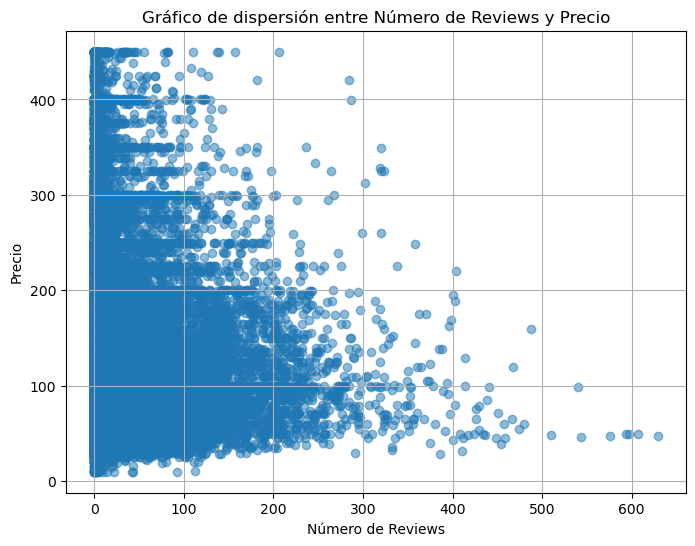

In [75]:
#Uno de los scatter plot que nos interesó analizar fue entre precio y número de reviews
plt.figure(figsize=(8, 6))
plt.scatter(df1_cleaned['number_of_reviews'], df1_cleaned['price'], alpha=0.5)
plt.title('Gráfico de dispersión entre Número de Reviews y Precio')
plt.xlabel('Número de Reviews')
plt.ylabel('Precio')
plt.grid(True)

In [77]:
#Un segundo scatter plot que nos interesó analizar fue entre precio y disponibilidad
#Para ello primero analizamos el rango de valores que toma la variable availability_365
promedio = df1_cleaned['availability_365'].mean()
maximo = df1_cleaned['availability_365'].max()
minimo = df1_cleaned['availability_365'].min()

print(f"Promedio: {promedio}")
print(f"Máximo: {maximo}")
print(f"Mínimo: {minimo}")

Promedio: 110.30779467680608
Máximo: 365
Mínimo: -999


In [79]:
#Dado que el airbnb no puede tener una disponibilidad menor a 0 días, eliminamos los valores menores a cero:
df1_cleaned = df1_cleaned[df1_cleaned['availability_365'] >= 0]
print(f"Número de observaciones restantes: {df1_cleaned.shape[0]}")

Número de observaciones restantes: 47325


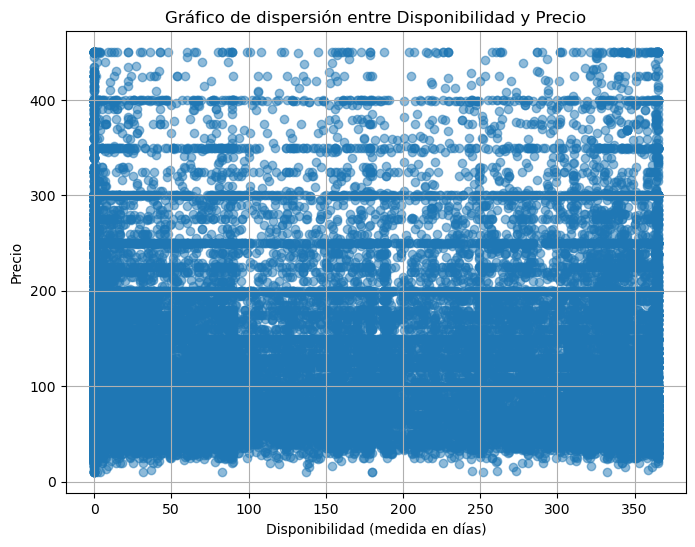

In [83]:
#Una vez corregido su rango, hacemos el scatter plot:
plt.figure(figsize=(8, 6))
plt.scatter(df1_cleaned['availability_365'], df1_cleaned['price'], alpha=0.5)
plt.title('Gráfico de dispersión entre Disponibilidad y Precio')
plt.xlabel('Disponibilidad (medida en días)')
plt.ylabel('Precio')
plt.grid(True)

In [85]:
#Instalamos las bibliotecas que vamos a necesitar para realizar esta parte del trabajo
import ISLP
from ISLP import load_data
from statsmodels.datasets import get_rdataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA